## Room Acoustics Notes
@Copyright Xingzihan 

### 2D情形

In [124]:
import pyroomacoustics as pra
import numpy as np
import matplotlib.pyplot as plt
import soundfile as sf

def help_view2D(room2D,xlim=[-1, 10],ylim=[-1, 10]):
    fig, ax = room2D.plot()
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    fig.show()

#### 1.创建二维房间

C:\Users\ZaneSing\AppData\Local\Temp\ipykernel_20488\852328199.py:10: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


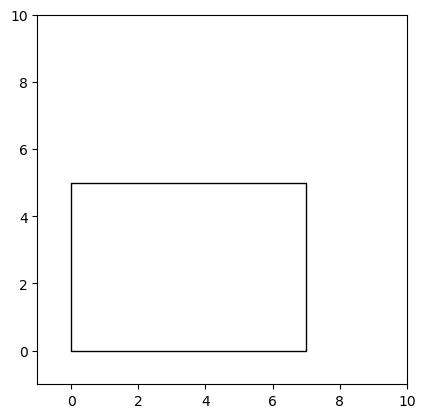

In [125]:
corner = np.array([[0, 0], [7, 0], [7, 5], [0, 5]]).T
room2D = pra.Room.from_corners(corner)

'''
corner: 房间的四个角。`pra.Room.from_corners()`的函数文档中表示四个角的声明顺序必须逆时针。
'''
help_view2D(room2D)

#### 2.在2D房间中添加声源
黑色实心点表示声源

C:\Users\ZaneSing\AppData\Local\Temp\ipykernel_20488\852328199.py:10: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


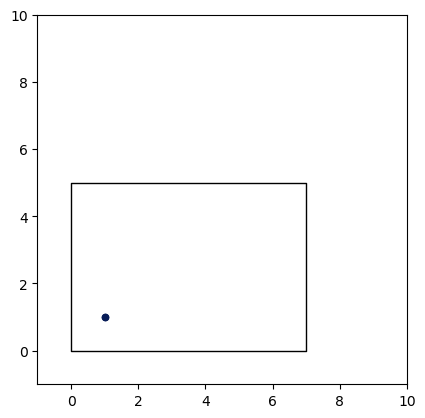

In [126]:

audio, sr = sf.read('wavs/speech_testing_mono_2205k.wav')
corner = np.array([[0, 0], [7, 0], [7, 5], [0, 5]]).T
room2D = pra.Room.from_corners(corner, fs=sr,
                              max_order=3,
                              materials=pra.Material(0.2, 0.15),
                              ray_tracing=True, air_absorption=True)
room2D.add_source([1, 1], signal=audio)

help_view2D(room2D)

#### 3.在2D房间中添加麦克风
叉号表示麦克风阵列

C:\Users\ZaneSing\AppData\Local\Temp\ipykernel_20488\852328199.py:10: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


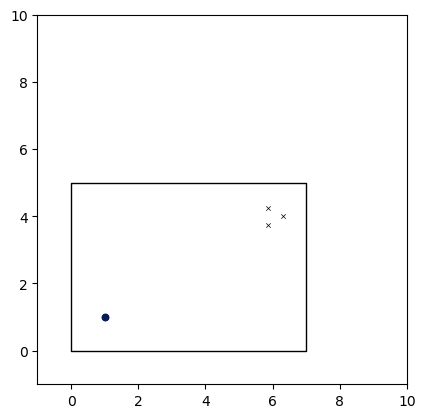

In [127]:
R = pra.circular_2D_array(center=[6.,4.], M=3, phi0=0, radius=0.3)
room2D.add_microphone_array(pra.MicrophoneArray(R, room2D.fs))
#绘制麦克风阵列
help_view2D(room2D)

#### 4.计算RIR
调用image方法

C:\Users\ZaneSing\AppData\Local\Temp\ipykernel_20488\3446338517.py:4: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


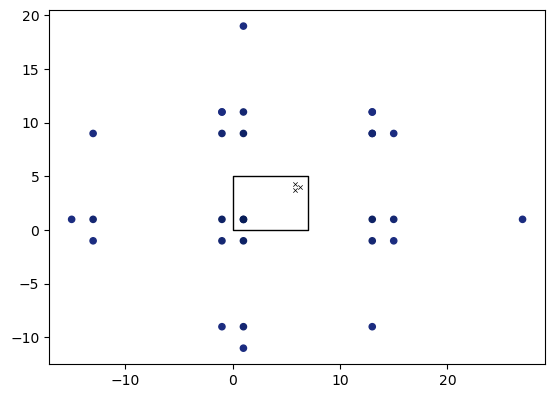

In [53]:
room2D.image_source_model()
fig, ax = room2D.plot(img_order=3)
# fig.set_size_inches(18.5, 10.5)
fig.show()

通过以下代码可以查看经过RIR后的语音

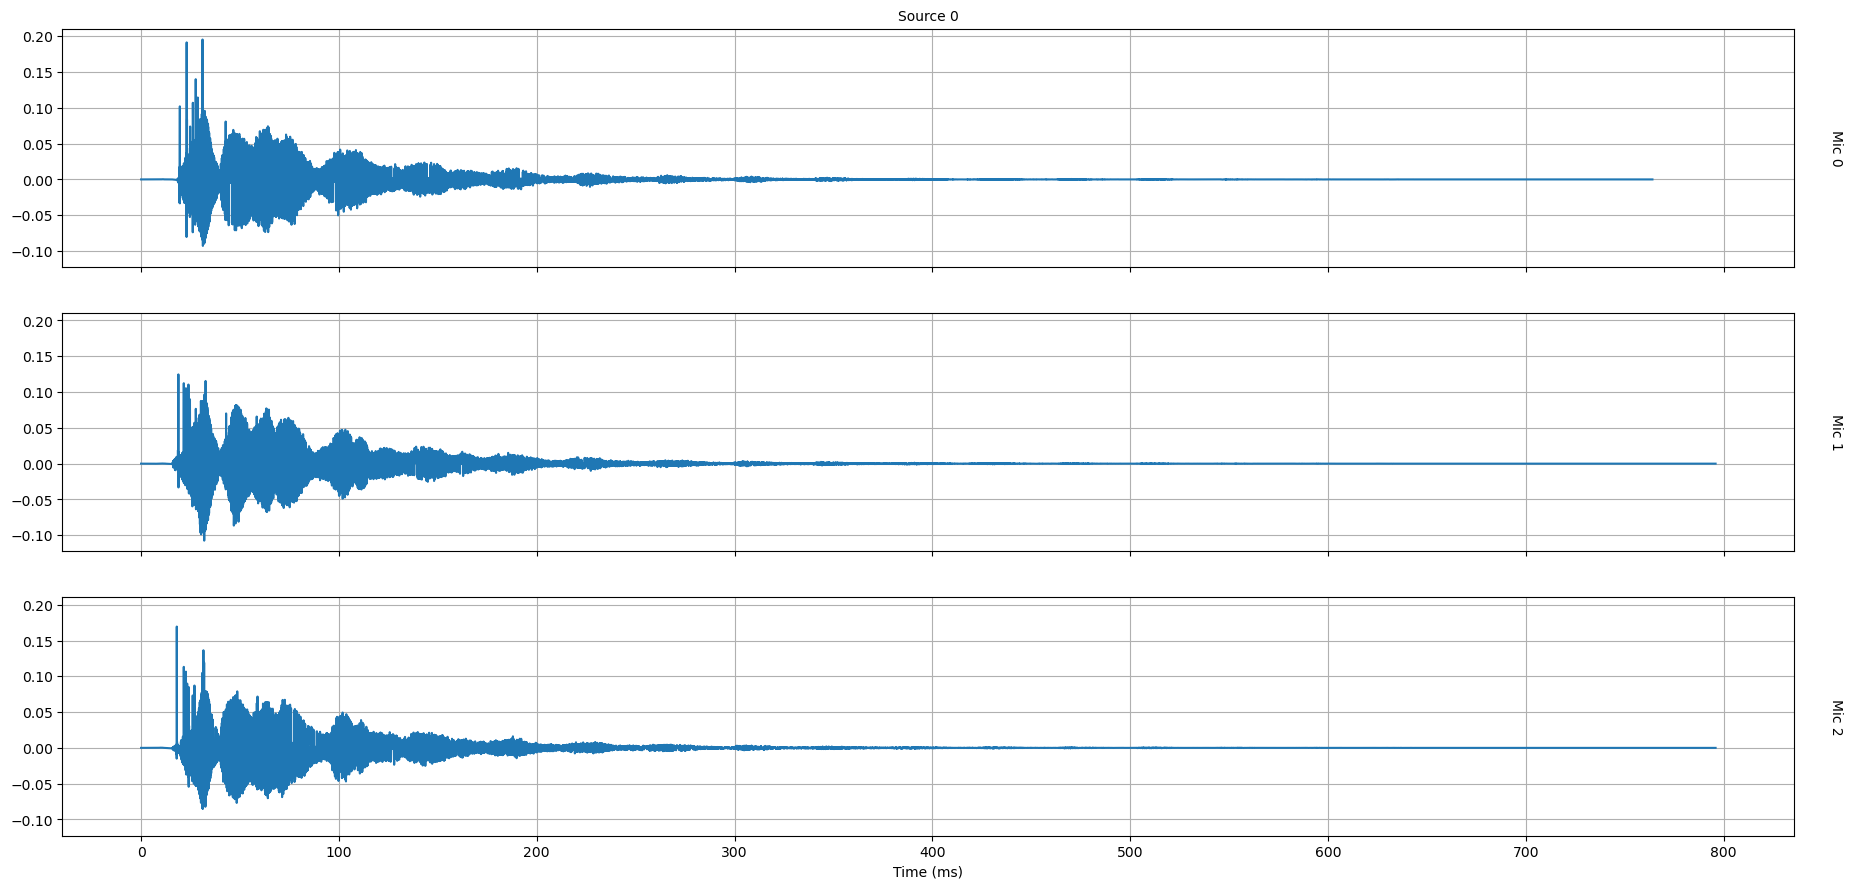

In [54]:
room2D.plot_rir()
fig= plt.gcf()
axs = fig.axes

fig.set_size_inches(20, 10)
for ax in axs:
    ax.grid(True)

通过`simulate()`方法可以查看经过过RIR后的语音,进行保存

In [55]:
room2D.simulate()
sf.write('wavs/speech_in_2DRoom_wav.wav', room2D.mic_array.signals.T, samplerate=sr)

### 3D情形

In [1]:
import pyroomacoustics as pra
import numpy as np
import matplotlib.pyplot as plt
import soundfile as sf

def help_view3D(room3D,xlim=[-2, 12],ylim=[-2, 12],zlim=[-1, 10],title=None):
    #绘制房间
    fig, ax = room3D.plot()
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    ax.set_zlim(zlim)
    ax.set_xlabel("x(m)")
    ax.set_ylabel("y(m)")
    ax.set_zlabel("z(m)")
    if title is not None:
        ax.set_title(title)
    fig.set_size_inches(8, 6)
    fig.show()      


#### 1.建立三维房间

C:\Users\ZaneSing\AppData\Local\Temp\ipykernel_20488\4267248063.py:18: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


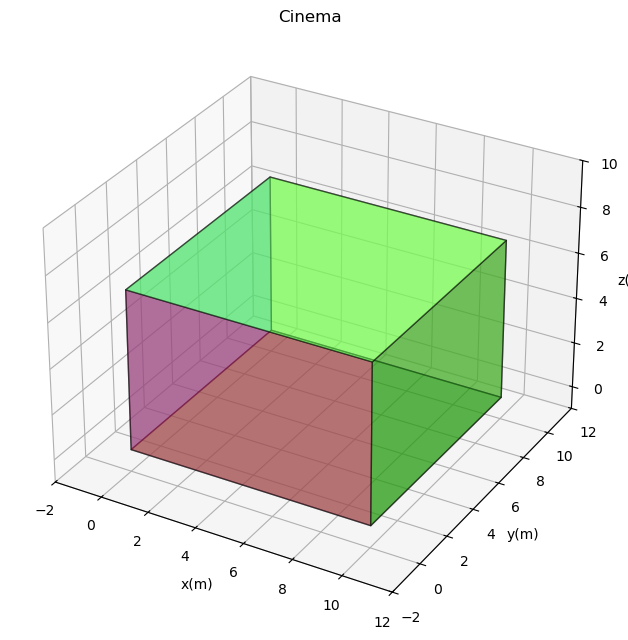

In [167]:
corners = np.array([[0, 0], [10, 0], [10, 10], [0, 10]]).T

wall_materials = {
    'east': pra.Material(0.8, 0.1),   # 屏幕墙：高吸声，低散射
    'west': pra.Material(0.4, 0.2),   # 后墙：中等吸声
    'north': pra.Material(0.3, 0.15), # 侧墙
    'south': pra.Material(0.3, 0.15), # 侧墙
    'ceiling': pra.Material(0.6, 0.1), # 天花板：较高吸声
    'floor': pra.Material(0.5, 0.05)   # 地板：地毯材质
}


room3D = pra.Room.from_corners(corners, fs=sr,
                              max_order=3,
                              materials=pra.Material(0.2, 0.15),
                              ray_tracing=True, 
                              air_absorption=True)
room3D.extrude(7.)#高度为7
help_view3D(room3D,title="Cinema")

#### 2.添加声源

/var/folders/6h/f1pxhnfx5gzcg9jmmqltv_840000gn/T/ipykernel_11488/4267248063.py:18: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


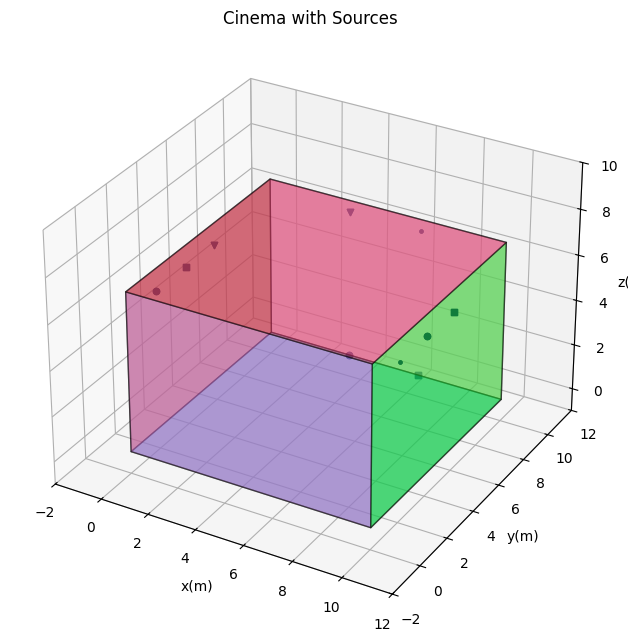

In [22]:
#加载音频
audio, sr = sf.read('wavs/speech_testing_mono_2205k.wav')

#设定影厅形状
corners = np.array([[0, 0], [10, 0], [10, 10], [0, 10]]).T
room3D = pra.Room.from_corners(corners, fs=sr,
                              max_order=10,
                              materials=pra.Material(0.2, 0.05),  #吸声系数,散射系数
                              #ray_tracing=True,
                              air_absorption=True,
                              )
room3D.extrude(7.)#高度为7

#设定影厅声源位置
sources = np.array([ [0, 2, 6],[0, 4, 6],[0, 6, 6],     #观众席左边三个声源
                     [10, 2, 6],[10, 4, 6],[10, 6, 6],  #观众席右边三个声源                    
                     [3.5, 10, 6.5], [6.5, 10, 6.5],    #电影屏幕上面两个声源
                     [3.5, 10, 0], [6.5, 10, 0],        #电影屏幕下面两个声源
                     ])
for pos in sources:                       # (x, y, z) 列向量
    room3D.add_source(pos, signal=audio)

#绘制房间
help_view3D(room3D,title="Cinema with Sources")

#### 3.添加Listener

/var/folders/6h/f1pxhnfx5gzcg9jmmqltv_840000gn/T/ipykernel_11488/4267248063.py:18: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


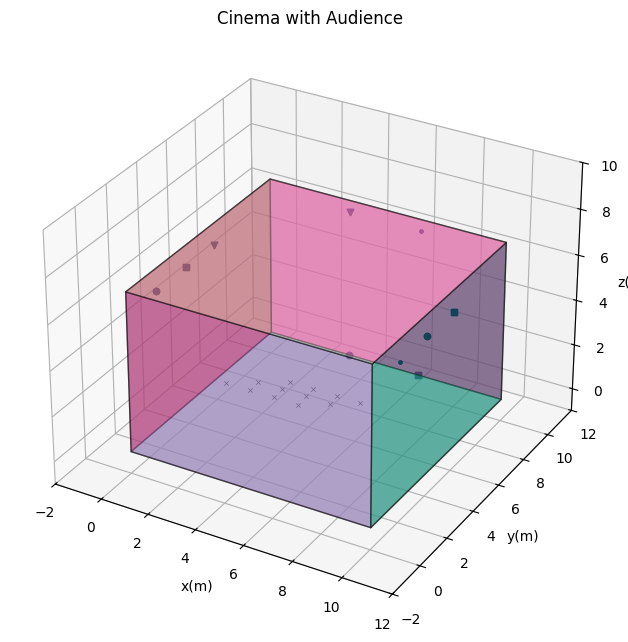

In [23]:
#座位位置
row_y = np.linspace(1., 5.5, 3)      # 3 排
col_x = np.linspace(3.5, 6.5, 4)      # 4 列
row_z  = np.linspace(3.6, 1.2, 3)    # 高度

audience = np.array([[x, y,  row_z[i]]        # 12 × 3
                     for i, y in enumerate(row_y)
                     for x in col_x] ).T   # → (3, 12)

# 把观众作为麦克风阵列加入房间 (可用于后续 RIR / 渲染)
mics = pra.MicrophoneArray(audience, room3D.fs)
room3D.add_microphone_array(mics)
help_view3D(room3D,title="Cinema with Audience")
       

#### 4.计算单位脉冲响应
使用rayTracing方法，计算RIR

- 此处需要了解概念，进行学习

In [24]:
# room3D.image_source_model()
# fig, ax = room3D.plot(img_order=6)
# # fig.set_size_inches(18.5, 10.5)
# fig.show()
'''使用rayTracing方法计算RIR'''
# 启用 RT；参数可按需要微调
fs  = room3D.fs                               # 22 050 Hz
fdl = pra.constants.get('frac_delay_length')  # 默认 2048

# 1) 选一个让 fdl % hbss == 0 的 hbss（≤256 都行）
hbss = 128                # 2048 ÷ 128 = 16 → 完全整除

# 2) 再把它换算回秒，给你想看的「几毫秒」概念
hist_bin_size_sec = hbss / fs                 # ≈ 5.80 ms

room3D.set_ray_tracing(
    n_rays          = 5000,     # 射线数真用几千~几万
    receiver_radius = 0.28,      # 0.25–0.35 m 都 OK
    energy_thres    = 1e-5,
    hist_bin_size   = hist_bin_size_sec # ⚠️ 直接给整数样点
    # （不要再传 hist_bin_size 了，两者只能择一）
)
room3D.compute_rir()   # 混合 ISM+RT；后期反射由 RT 生成

##### 绘制3D房间内的RIR

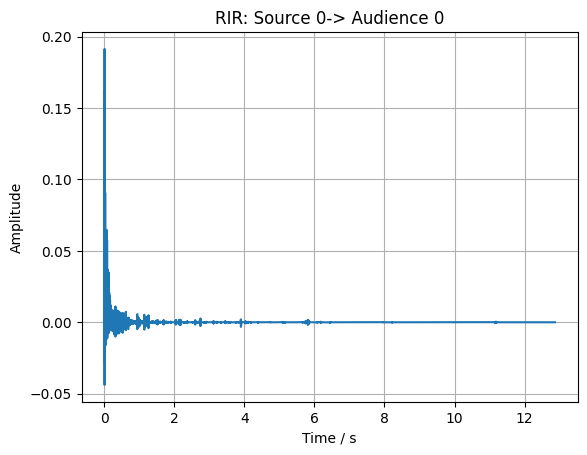

In [25]:

'''绘制单位脉冲响应的函数，输入房间，声源索引和麦克风索引'''
def help_view_RIR(room3D,source_index,mic_index):
    rir = room3D.rir[mic_index][source_index]
    plt.plot(np.arange(len(rir)) / room3D.fs, rir)
    plt.xlabel("Time / s"); plt.ylabel("Amplitude")
    plt.title(f"RIR: Source {0}-> Audience {0}")
    plt.grid(True)
    plt.show()
rir = room3D.rir[0][0]

help_view_RIR(room3D,source_index =0,mic_index =0)


假设影院为线性系统，则针对于某一听众的IR就是所有声源的RIR总和

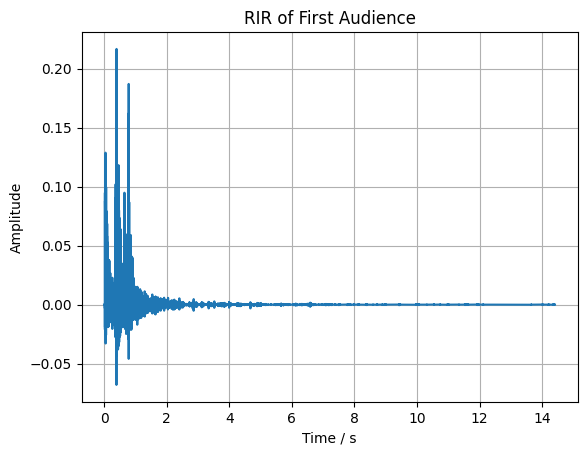

In [26]:

def pad_center(arr: np.ndarray, target_len: int) -> np.ndarray:
    """把 1-D 数组 arr 居中放进目标长度数组，左右补零。"""
    out = np.zeros(target_len, dtype=arr.dtype)
    offset = (target_len - len(arr)) // 2          # 左边留多少空位
    out[offset: offset + len(arr)] = arr
    return out

mic_id   = 0                     # 选第 1 位观众
n_src    = room3D.n_sources      # ← 这里就是 10
max_len  = max(len(room3D.rir[mic_id][s]) for s in range(n_src))

stacked = np.stack([
    pad_center(room3D.rir[mic_id][s], max_len)  # 每条都补到 max_len
    for s in range(n_src)
])

rir_sum = stacked.sum(axis=0)    # (n_src, max_len) → (max_len,)
plt.plot(np.arange(len(rir_sum)) / room3D.fs, rir_sum)
plt.xlabel("Time / s"); plt.ylabel("Amplitude")
plt.title(f"RIR of First Audience")
plt.grid(True)
plt.show()

#### 5.获取听众的音频

In [27]:
room3D.simulate()
k = 6                             #k+1位听众
heard = room3D.mic_array.signals[k]   # 1-D numpy array
sf.write(f"wavs/audience{k+1}_in_cinema.wav", heard, room3D.fs)